在 seaborn 中，有几种不同的方法可以对分类数据进行可视化。<br><br>
类似于relplot()与scatterplot()或者lineplot()之间的关系，有两种方法可以制作这些图。<br><br>有许多轴级函数可以用不同的方式绘制分类数据，还有一个基础轴级接口catplot()，可以对它们进行统一的访问。

**分类散点图：**
- stripplot()  也可以  catplot(kind="strip"); the default
- swarmplot()  也可以  catplot(kind="swarm")

**分类分布图：**
- boxplot()   也可以  catplot(kind="box")
- violinplot()  也可以  catplot(kind="violin")
- boxenplot()  也可以  catplot(kind="boxen")

**分类估计图：**
- pointplot()  也可以  catplot(kind="point")
- barplot()  也可以  catplot(kind="bar")
- countplot()   也可以   catplot(kind="count")

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

### 一、分类散点图

#### 1. stripplot()
>catplot()中 kind 的默认参数，它是用少量随机“抖动”调整分类轴上的点的位置

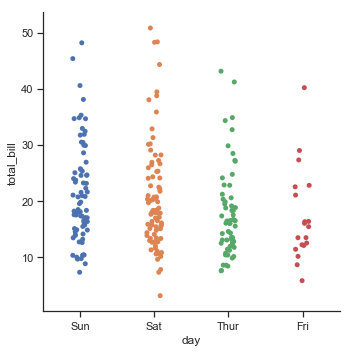

In [2]:
tips = pd.read_csv('seaborn-data/tips.csv')
sns.catplot(x="day", y="total_bill", data=tips)

#####  参数jitter：控制抖动的大小，你也可以完全禁用它

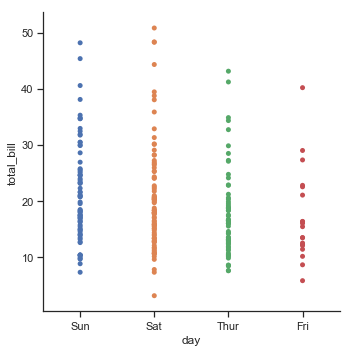

In [3]:
sns.catplot(x="day", y="total_bill", jitter=False, data=tips)

#### 2. swarmplot()
>使用防止它们重叠的算法沿着分类轴调整点，但是只适用于相对较小的数据集，通过在catplot()中设置kind="swarm"来激活

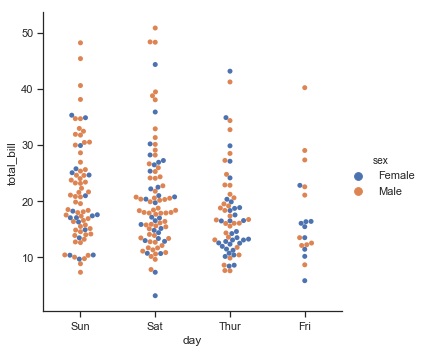

In [4]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips)

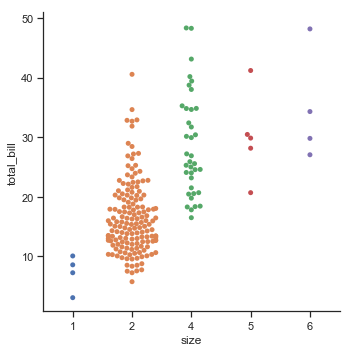

In [5]:
sns.catplot(x="size", y="total_bill", kind="swarm",
            data=tips.query("size != 3"))

##### order参数：在特定图表的基础上控制排序

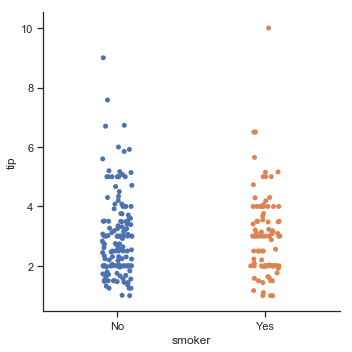

In [6]:
sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips)

在这些示例中，它始终对应于水平轴。但是将分类变量放在垂直轴上

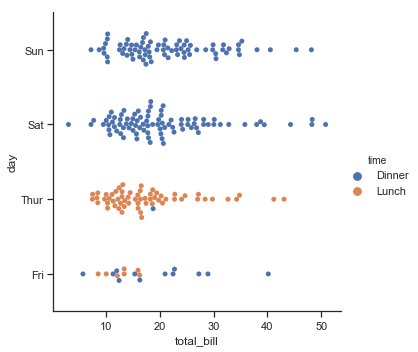

In [7]:
sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips)

### 二、分类分布图
#### 1. boxplot()   ——箱线图

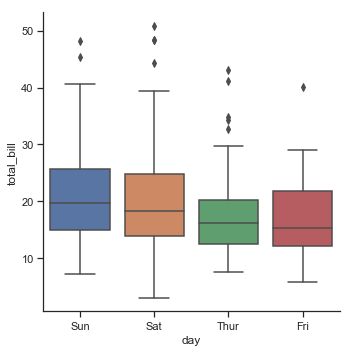

In [3]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips)

添加hue参数, 语义变量的每个级别的框沿着分类轴移动，因此它们将不会重叠

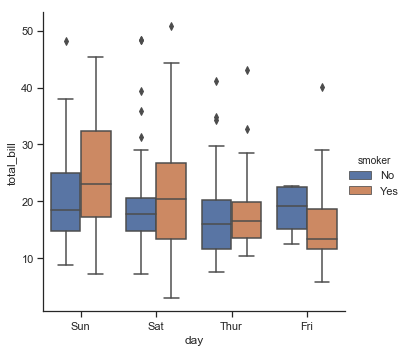

In [4]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips)

此行为被称为“dodging”，默认开启，因为我们假定语义变量嵌套在主分类变量中。如果不是这样，可以禁用 dodging

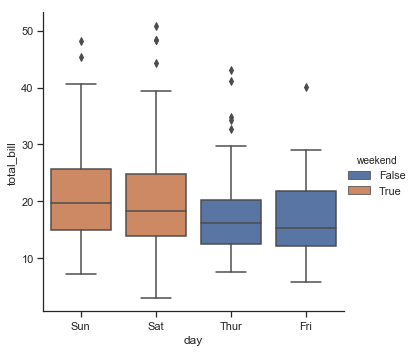

In [5]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(x="day", y="total_bill", hue="weekend",
            kind="box", dodge=False, data=tips)

#### 2  boxenplot() ——箱线图
>可以绘制一个与 Box-plot 类似的图。它为了显示更多信息而对分布的形状进行了优化，比较适合于较大的数据集

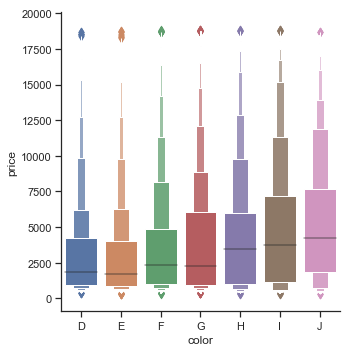

In [6]:
diamonds = pd.read_csv('seaborn-data/diamonds.csv')
sns.catplot(x="color", y="price", kind="boxen",
            data=diamonds.sort_values("color"))

#### 3. violinplot()   ——小提琴图
>它将箱线图与分布教程中描述的核密度估算程序结合起来

d:\soft\_env\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


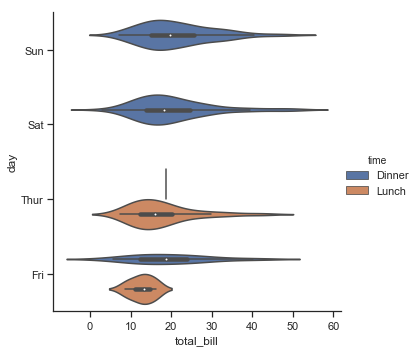

In [7]:
sns.catplot(x="total_bill", y="day", hue="time",
            kind="violin", data=tips)

该方法使用核密度估计来提供更丰富的值分布描述。
此外，violin 中还显示了来自箱线图的四分位数和 whikser 值。缺点是由于 violinplot 使用了 KDE，我们需要调整一些额外参数，与箱形图相比增加了一些复杂性

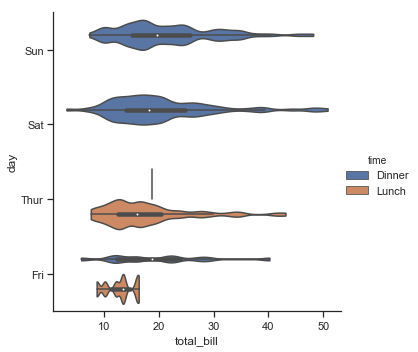

In [8]:
sns.catplot(x="total_bill", y="day", hue="time",
            kind="violin", bw=.15, cut=0,
            data=tips)

可以将swarmplot()或striplot()与箱形图或 violin plot 结合起来，展示每次观察以及分布摘要

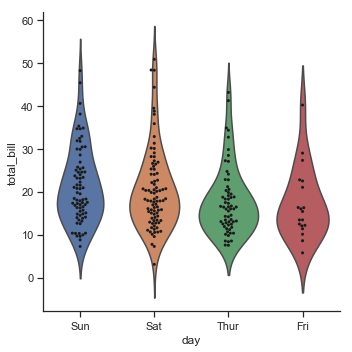

In [9]:
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax)

### 三、类别内的统计估计
对于其他应用程序，你可能希望显示值的集中趋势估计，而不是显示每个类别中的分布
#### 1. barplot()  ——条形图
>在 seaborn 中，barplot()函数在完整数据集上运行并应用函数来获取估计值（默认情况下取平均值）。当每个类别中有多个观察值时，它还使用自举来计算估计值周围的置信区间，并使用误差条绘制

d:\soft\_env\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


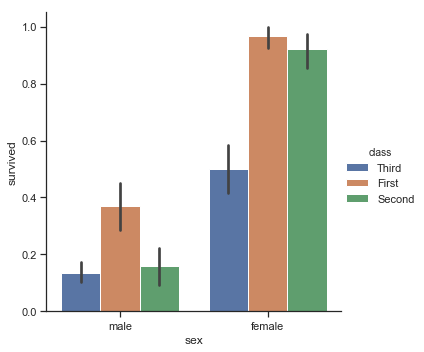

In [10]:
titanic = pd.read_csv('seaborn-data/titanic.csv')
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)

#### 2. countplot() ——条形图
>条形图的一个特例是，当你想要显示每个类别中的观察数量而不是计算第二个变量的统计数据时。这类似于分类而非定量变量的直方图

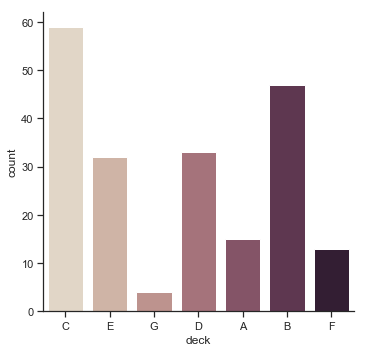

In [11]:
sns.catplot(x="deck", kind="count", palette="ch:.25", data=titanic)

无论是barplot()还是countplot()，都可以使用上面讨论的所有选项，也可以调用每个函数的文档示例中的其他选项

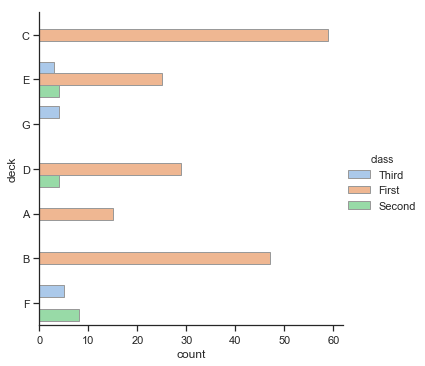

In [12]:
sns.catplot(y="deck", hue="class", kind="count",
            palette="pastel", edgecolor=".6",
            data=titanic)

#### 3. pointplot()——点图
>函数提供了另一种可视化相同信息的样式。此函数还对另一个轴上的高度估计值进行编码，但不是显示一个完整的条形图，而是绘制点估计值和置信区间。另外，pointplot()连接来自相同hue类别的点。

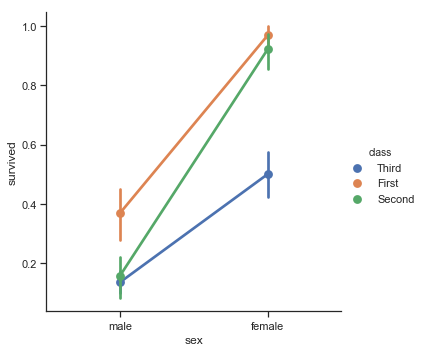

In [13]:
sns.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic)

### 四、显示与 facet 的多种关系
就像relplot()一样, catplot()建立在FacetGrid上，这意味着很容易添加层面变量来可视化高维关系

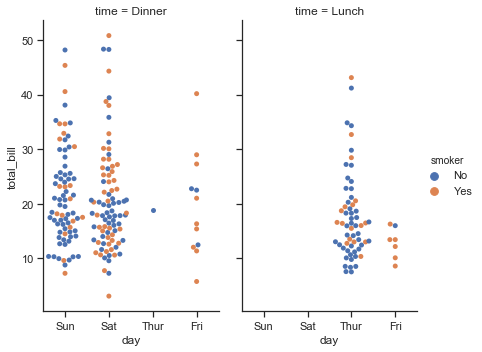

In [14]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time", aspect=.6,
            kind="swarm", data=tips)

要进一步自定义绘图，我们可以使用它返回的FacetGrid对象上的方法

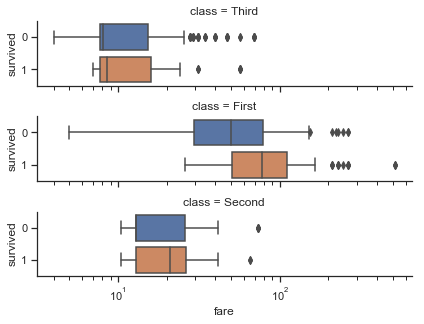

In [15]:
g = sns.catplot(x="fare", y="survived", row="class",
                kind="box", orient="h", height=1.5, aspect=4,
                data=titanic.query("fare > 0"))
g.set(xscale="log")